<a href="https://colab.research.google.com/github/ashborn8/Parcial2_R.A.2/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 : Visualización del proceso de retropropagación en PyTorch

# Paso 1: Importar librerías y definir el modelo

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definir el modelo
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(784, 128)  # Capa oculto
    self.fc2 = nn.Linear(128, 10)   # Capa de salida

  def forward(self, x):
    x = torch.relu(self.fc1(x))     # Activacion ReLu en la capa oculta
    x = self.fc2(x)                 # Capa de salida
    return x

# Paso 2: Inicialización de componentes

In [3]:
# Iniciar el modelo, criterio y optimizador

model = SimpleNN()
criterion = nn.CrossEntropyLoss()   # Perdida de entropia cruzada
optimizer = optim.Adam(model.parameters(), lr=0.001)    # OPtimizador Adam

# Paso 3: Generar datos de entrenamiento

In [4]:
# Crear datos de entrenamiento aleatorios
x_train = torch.rand((1000, 784))   # Datos aleatorios
y_train = torch.randint(0, 10, (1000,))    # Etiquetas aleatorias

# Paso 4: Entrenamiento y visualización

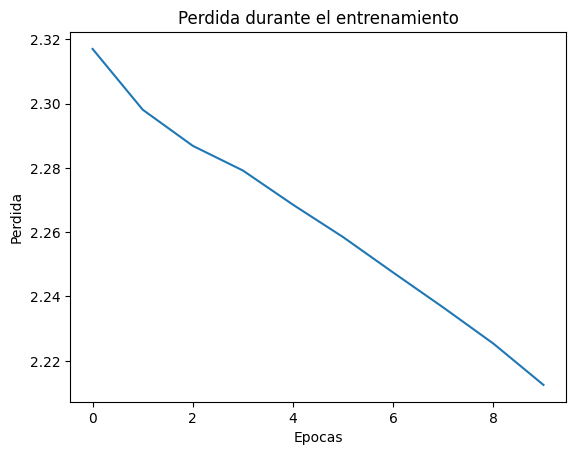

In [5]:
# Listas para almacenar la perdida
losses = []

# Entrenamiento
for epoch in range(10):
  optimizer.zero_grad() # Iniciar los gradientes
  outputs = model(x_train)  # Pasar los datos a traves del modelo
  loss = criterion(outputs, y_train)  #Calcular la perdida
  losses.append(loss.item())  # Almacenar la perdida
  loss.backward() # Calcular gradientes
  optimizer.step()  # Actualizar los pesos

# Graficar la perdida
plt.plot(losses)
plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.show()

# Ejercicio 2: Optimización Adam para acelerar el aprendizaje en TensorFlow

In [6]:
# Paso 1: Importar librerías
import tensorflow as tf
import numpy as np

In [7]:
# Paso 2: Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),  # Primera capa oculta
    tf.keras.layers.Dense(64, activation='relu'),                      # Segunda capa oculta
    tf.keras.layers.Dense(10, activation='softmax')                    # Capa de salida
])

In [8]:
# Paso 3: Compilar el modelo usando Adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Paso 4: Preparar el conjunto de datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización
x_train = x_train.reshape(-1, 784)  # Aplanado de imágenes
x_test = x_test.reshape(-1, 784)

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
# Paso 5: Entrenar el modelo
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9174
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9610
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9874
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [11]:
# Paso 6: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión del modelo en los datos de prueba: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.9764
Precisión del modelo en los datos de prueba: 0.9764000177383423


# Ejercicio 3: Red neuronal de una sola capa para clasificación binaria usando Keras

In [12]:
# Paso 1: Importar TensorFlow y NumPy
import tensorflow as tf
import numpy as np

In [13]:
# Paso 2: Generar datos de ejemplo para clasificación binaria
np.random.seed(42)
X = np.random.randn(1000, 20)
y = np.where(np.sum(X, axis=1) > 10, 1, 0)

In [14]:
# Paso 3: Definir la red de una sola capa
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(20,))  # Capa única con activación sigmoide
])

In [15]:
# Paso 4: Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Paso 5: Entrenar el modelo
model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.4910
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8090 - accuracy: 0.5020
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7796 - accuracy: 0.5200
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7515 - accuracy: 0.5300
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7241 - accuracy: 0.5550
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5760
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5900
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6150
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.6420
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6680


In [17]:
# Paso 6: Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Precisión del modelo: {accuracy}')

32/32 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.6790
Precisión del modelo: 0.6790000200271606
